In [89]:
%load_ext autoreload
%autoreload 1
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 
%aimport analysis
%aimport learning
%aimport NV_generator

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [90]:
figures_path = "../../../Writing/Thesis/Figures/"
B_field = 0.0403555 # Teslas
gam_c = 67.262 * 10 ** 6 # Gyromagnetic ratio for a single c13 nucleus in rad s-1 T-1
ms = 1
omega_larmor = -1 * ms * gam_c * B_field

In [91]:
diamond = learning.load_obj("diamonds/diamond_21")
A, B = diamond["A"], diamond["B"]

In [93]:
N = 64
tau = analysis.choose_tau_params(N)
def data_func(N, tau, noise_level = .02): #put the noise at .02
    data = analysis.calc_M(A, B, N, omega_larmor, tau)
    noise = np.random.randn(len(data)) * noise_level
    return data + noise
M = data_func(N, tau, 0)

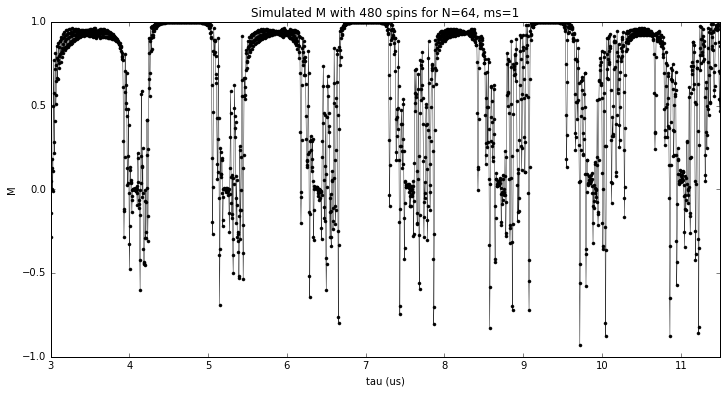

In [94]:
%matplotlib inline
fig,ax = analysis.initialize_data_plot(figsize = (12,6), xlims = [3,11.5], ylims = [-1,1])
ax.set_xlabel('tau (us)')
ax.set_ylabel('M')
ax.plot(tau * 1e6, M, '.-k', lw=0.4, label = 'M')
#plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.0)
plt.title("Simulated M with " + str(len(A)) + " spins for N=" + str(N) +", ms=" + str(ms))
plt.savefig(figures_path + "Dynamical_Decoupling/dynamical_decoupling_M_simulation_N"+str(N)+"_ms"+str(ms))
plt.show()

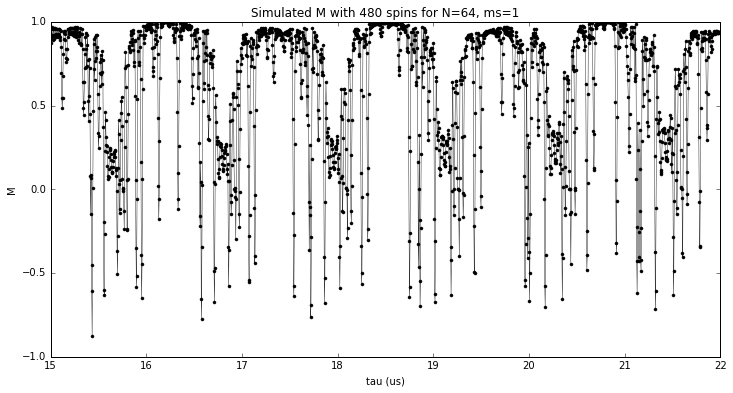

In [95]:
%matplotlib inline
fig,ax = analysis.initialize_data_plot(figsize = (12,6), xlims = [15,22], ylims = [-1,1])
ax.set_xlabel('tau (us)')
ax.set_ylabel('M')
ax.plot(tau * 1e6, M, '.-k', lw=0.4, label = 'M')
#plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.0)
plt.title("Simulated M with " + str(len(A)) + " spins for N=" + str(N) +", ms=" + str(ms))
plt.savefig(figures_path + "Dynamical_Decoupling/dynamical_decoupling_M_simulation_N"+str(N)+"_ms"+str(ms)+"_high_tau")
plt.show()

In [51]:
%matplotlib inline
#no_noise = lambda N, tau: data_func(N, tau, 0)
As, Bs, all_guess_As, all_guess_Bs, select_As, select_Bs, guess_As, guess_Bs, cluster_As, cluster_Bs = analysis.analyze_diamond(data_func, N, omega_larmor, verbose=False, plots=False)

In [71]:
#results_dict = {"A" : A, "B" : B, "As" : As, "Bs" : Bs, "all_guess_As" : all_guess_As, "all_guess_Bs" : all_guess_Bs, "least_squares_As" : select_As,
#               "least_squares_Bs" : select_Bs, "svm_As" : guess_As, "svm_Bs" : guess_Bs, "cluster_As" : cluster_As,
#               "cluster_Bs" : cluster_Bs}
#learning.store_obj(results_dict, "example_simulation_results/example_simulation_diamond_21")
results_dict = learning.load_obj("example_simulation_results/example_simulation_diamond_21")

In [96]:
len(all_guess_As), len(A)

(10738, 480)

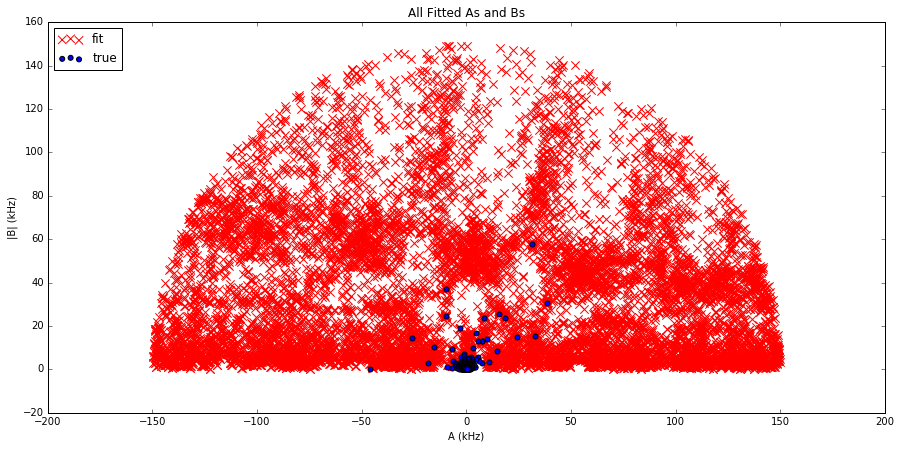

In [81]:
%matplotlib inline
diamond_ind = 21
plt.figure(figsize=(15,7))
plt.title("All Fitted As and Bs")
plt.xlabel("A (kHz)")
plt.ylabel("|B| (kHz)")
plt.scatter(all_guess_As/analysis.mag, np.abs(all_guess_Bs)/analysis.mag, c='r', marker = 'x', s = 70, label = 'fit')
plt.scatter(A/analysis.mag, np.abs(B)/analysis.mag, c='b', marker = 'o', s = 25, label = 'true')
plt.legend(loc=2)
plt.savefig(figures_path + "Fitted_A_B/all_guesses")
plt.show()

In [60]:
len(select_As), len(A)

(832, 480)

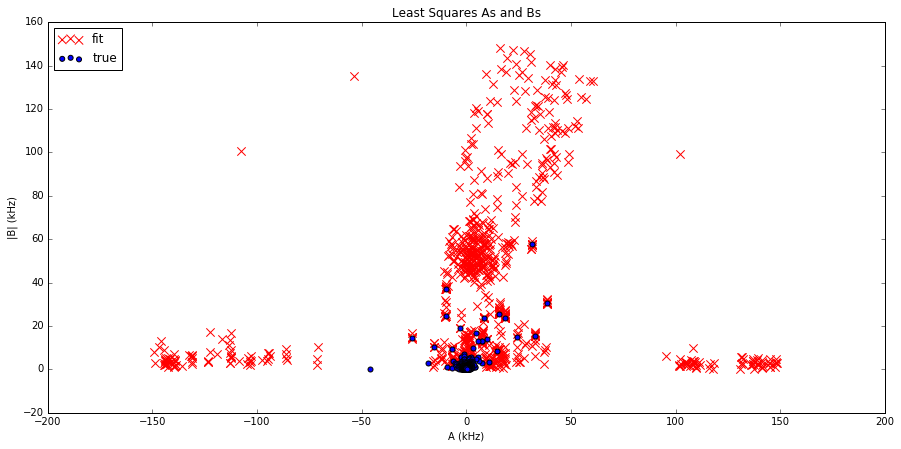

In [80]:
%matplotlib inline
diamond_ind = 21
plt.figure(figsize=(15,7))
plt.title("Least Squares As and Bs")
plt.xlabel("A (kHz)")
plt.ylabel("|B| (kHz)")
plt.scatter(select_As/analysis.mag, np.abs(select_Bs)/analysis.mag, c='r', marker = 'x', s = 70, label = 'fit')
plt.scatter(A/analysis.mag, np.abs(B)/analysis.mag, c='b', marker = 'o', s = 25, label = 'true')
plt.legend(loc=2)
plt.savefig(figures_path + "Fitted_A_B/least_squares_guesses")
plt.show()

In [75]:
len(guess_As), len(A)

(96, 480)

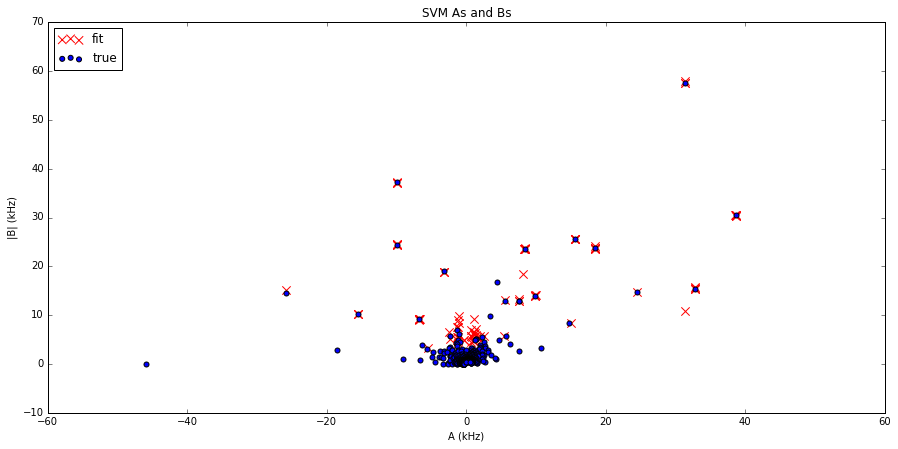

In [79]:
%matplotlib inline
diamond_ind = 21
plt.figure(figsize=(15,7))
plt.title("SVM As and Bs")
plt.xlabel("A (kHz)")
plt.ylabel("|B| (kHz)")
plt.scatter(guess_As/analysis.mag, np.abs(guess_Bs)/analysis.mag, c='r', marker = 'x', s = 70, label = 'fit')
plt.scatter(A/analysis.mag, np.abs(B)/analysis.mag, c='b', marker = 'o', s = 25, label = 'true')
plt.legend(loc=2)
plt.savefig(figures_path + "Fitted_A_B/svm_guesses")
plt.show()

In [82]:
len(cluster_As), len(A)

(25, 480)

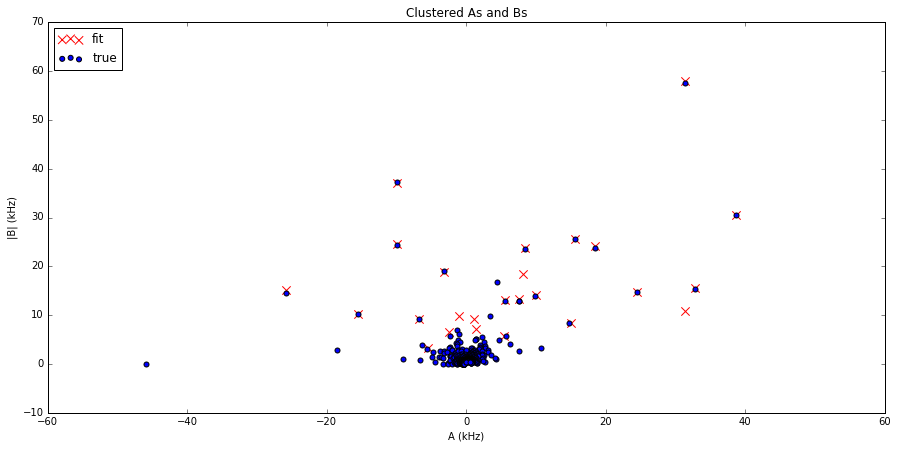

In [78]:
%matplotlib inline
diamond_ind = 21
plt.figure(figsize=(15,7))
plt.title("Clustered As and Bs")
plt.xlabel("A (kHz)")
plt.ylabel("|B| (kHz)")
plt.scatter(cluster_As/analysis.mag, np.abs(cluster_Bs)/analysis.mag, c='r', marker = 'x', s = 70, label = 'fit')
plt.scatter(A/analysis.mag, np.abs(B)/analysis.mag, c='b', marker = 'o', s = 25, label = 'true')
plt.legend(loc=2)
plt.savefig(figures_path + "Fitted_A_B/clustered_guesses")
plt.show()

In [83]:
len(As), len(A)

(23, 480)

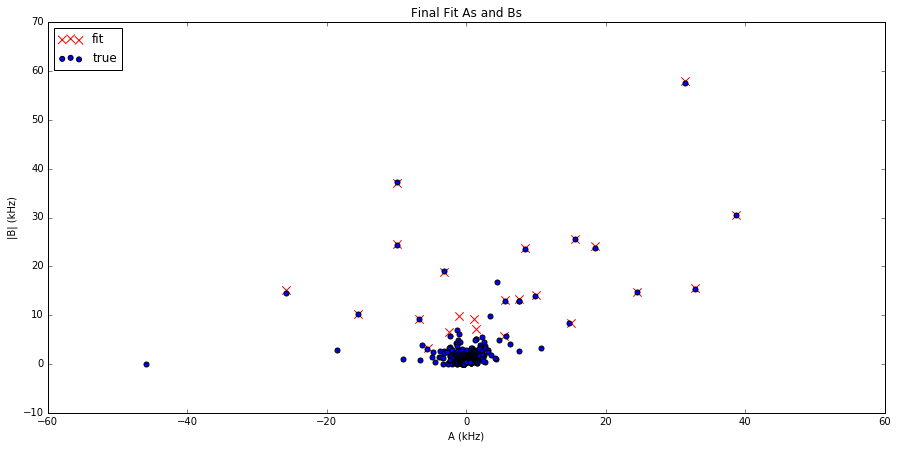

In [84]:
%matplotlib inline
diamond_ind = 21
plt.figure(figsize=(15,7))
plt.title("Final Fit As and Bs")
plt.xlabel("A (kHz)")
plt.ylabel("|B| (kHz)")
plt.scatter(As/analysis.mag, np.abs(Bs)/analysis.mag, c='r', marker = 'x', s = 70, label = 'fit')
plt.scatter(A/analysis.mag, np.abs(B)/analysis.mag, c='b', marker = 'o', s = 25, label = 'true')
plt.legend(loc=2)
plt.savefig(figures_path + "Fitted_A_B/final_guesses")
plt.show()

In [85]:
num_correct = 0
spins = set(zip(diamond["A"], np.abs(diamond["B"])))
for A, B in zip(As, np.abs(Bs)):
    for spin in spins:
        if learning.is_fit(A, B, spin, A_acc = .5, B_acc = 2):
            num_correct = num_correct + 1
            spins.remove(spin)
            break
num_incorrect = len(As) - num_correct
print "correct: ", num_correct, "incorrect: ", len(As) - num_correct

correct:  20 incorrect:  3


In [86]:
M_fit = analysis.calc_M(As, Bs, N, omega_larmor, tau)
background_dict = learning.load_obj("background_A_B")
A_background, B_background = background_dict["A_background"], background_dict["B_background"]
M_background = analysis.calc_M(A_background, B_background, N, omega_larmor, tau)
M_full = M_fit * M_background

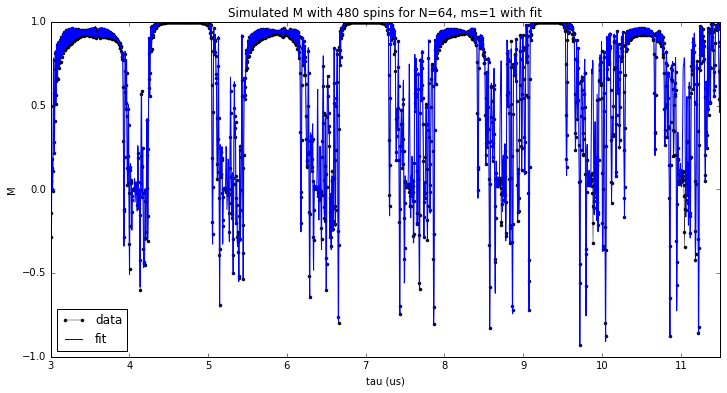

In [116]:
%matplotlib inline
fig,ax = analysis.initialize_data_plot(figsize = (12,6), xlims = [3,11.5], ylims = [-1,1])
ax.set_xlabel('tau (us)')
ax.set_ylabel('M')
ax.plot(tau * 1e6, M, '.-k', lw=0.4, label = 'data')
ax.plot(tau * 1e6, M_full, label = 'fit')
#plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.0)
plt.title("Simulated M with " + str(len(A)) + " spins for N=" + str(N) +", ms=" + str(ms) + " with fit")
ax.legend(loc=3)#, bbox_to_anchor=(1, .94))
plt.savefig(figures_path + "Dynamical_Decoupling/dynamical_decoupling_M_simulation_N"+str(N)+"_ms"+str(ms)+"_with_fit")
plt.show()

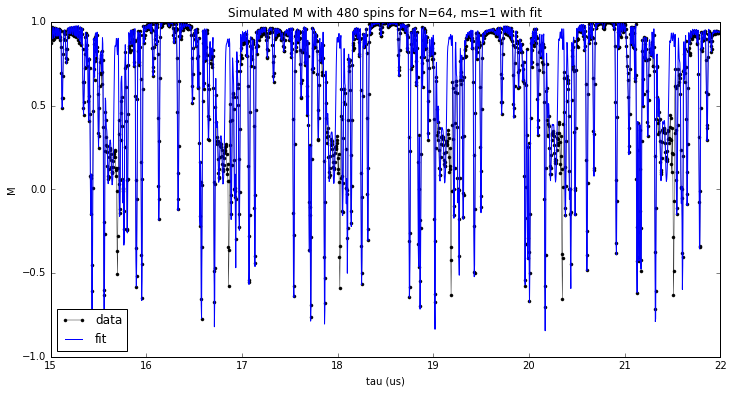

In [117]:
%matplotlib inline
fig,ax = analysis.initialize_data_plot(figsize = (12,6), xlims = [15,22], ylims = [-1,1])
ax.set_xlabel('tau (us)')
ax.set_ylabel('M')
ax.plot(tau * 1e6, M, '.-k', lw=0.4, label = 'data')
ax.plot(tau * 1e6, M_full, label = 'fit')
#plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.0)
plt.title("Simulated M with " + str(len(A)) + " spins for N=" + str(N) +", ms=" + str(ms) + " with fit")
plt.legend(loc=3)
plt.savefig(figures_path + "Dynamical_Decoupling/dynamical_decoupling_M_simulation_N"+str(N)+"_ms"+str(ms)+"_high_tau_with_fit")
plt.show()